In [1]:
import numpy as np 
import pandas as pd 

In [2]:

df = pd.read_csv('/content/users_interactions.csv')

In [3]:
df

,timestamp,eventType,contentId,personId,sessionId,userAgent,userRegion,userCountry
0,1465413032,VIEW,-3499919498720038879,-8845298781299428018,1264196770339959068,NaN,NaN,NaN
1,1465412560,VIEW,8890720798209849691,-1032019229384696495,3621737643587579081,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_2...,NY,US
2,1465416190,VIEW,310515487419366995,-1130272294246983140,2631864456530402479,NaN,NaN,NaN
3,1465413895,FOLLOW,310515487419366995,344280948527967603,-3167637573980064150,NaN,NaN,NaN
4,1465412290,VIEW,-7820640624231356730,-445337111692715325,5611481178424124714,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...
72307,1485190425,LIKE,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR
72308,1485190425,VIEW,-5813211845057621660,102305705598210278,5527770709392883642,Mozilla/5.0 (X11; Linux x86_64) AppleWebKit/53...,SP,BR
72309,1485190072,VIEW,-1999468346928419252,-9196668942822132778,-8300596454915870873,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,SP,BR
72310,1485190434,VIEW,-6590819806697898649,-9016528795238256703,8614469745607949425,Mozilla/5.0 (Macintosh; Intel Mac OS X 10_11_4...,MG,BR


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   timestamp    72312 non-null  int64 
 1   eventType    72312 non-null  object
 2   contentId    72312 non-null  int64 
 3   personId     72312 non-null  int64 
 4   sessionId    72312 non-null  int64 
 5   userAgent    56918 non-null  object
 6   userRegion   56907 non-null  object
 7   userCountry  56918 non-null  object
dtypes: int64(4), object(4)
memory usage: 4.4+ MB


In [5]:
df.nunique()

timestamp      68772
eventType          5
contentId       2987
personId        1895
sessionId      28740
userAgent       1090
userRegion        71
userCountry       23
dtype: int64

In [6]:
## how many likes , views , follows ??

In [7]:
df['eventType'].value_counts()

VIEW               61086
LIKE                5745
BOOKMARK            2463
COMMENT CREATED     1611
FOLLOW              1407
Name: eventType, dtype: int64

In [8]:
#maximum engagements on content by count 

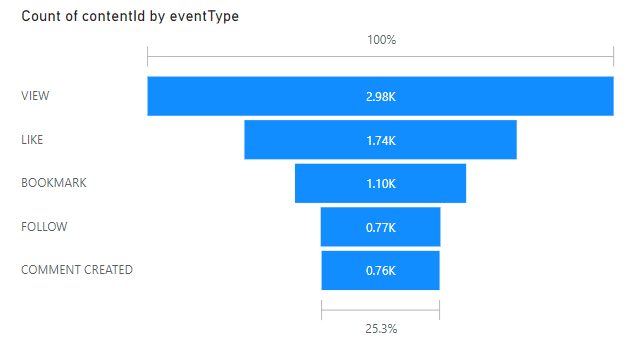

In [9]:
#maximum engagements by person by count 

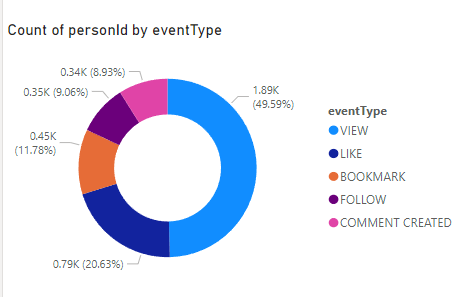

In [10]:
## top 500 most popular contents

In [11]:
top_500 = df['contentId'].value_counts()[0:500]
top_500

-4029704725707465084    433
-133139342397538859     315
 8657408509986329668    294
-6783772548752091658    294
-6843047699859121724    281
                       ... 
-3102446808559723934     40
 5037221949349729844     40
 8402348887626635381     40
 3579921471626387620     40
-3912939678517879962     40
Name: contentId, Length: 500, dtype: int64

***Dropping the timestamp, useragent,userregion,country and session id***

In [12]:
df.drop(['timestamp','userAgent','userRegion','userCountry' , 'sessionId'] , axis = 1 , inplace = True)

In [13]:
df

,eventType,contentId,personId
0,VIEW,-3499919498720038879,-8845298781299428018
1,VIEW,8890720798209849691,-1032019229384696495
2,VIEW,310515487419366995,-1130272294246983140
3,FOLLOW,310515487419366995,344280948527967603
4,VIEW,-7820640624231356730,-445337111692715325
...,...,...,...
72307,LIKE,-6590819806697898649,-9016528795238256703
72308,VIEW,-5813211845057621660,102305705598210278
72309,VIEW,-1999468346928419252,-9196668942822132778
72310,VIEW,-6590819806697898649,-9016528795238256703


In [14]:
df.columns


Index(['eventType', 'contentId', 'personId'], dtype='object')

In [15]:
# decided to cluster the users based on content engagements
# but the views , likes , comments , follow and bookmark are different kinds of engagements i.e, follow >> viewing or liking
# so i have decided to add some weights to the engagements -- view < like < comment < follow < bookmark

In [16]:
maps = {'VIEW' : 1 , 'LIKE' : 2 , 'COMMENT CREATED' : 3, 'FOLLOW' : 4 , 'BOOKMARK' : 5 }

In [17]:
df['eventType'] = df['eventType'].map(maps)

In [18]:
df

,eventType,contentId,personId
0,1,-3499919498720038879,-8845298781299428018
1,1,8890720798209849691,-1032019229384696495
2,1,310515487419366995,-1130272294246983140
3,4,310515487419366995,344280948527967603
4,1,-7820640624231356730,-445337111692715325
...,...,...,...
72307,2,-6590819806697898649,-9016528795238256703
72308,1,-5813211845057621660,102305705598210278
72309,1,-1999468346928419252,-9196668942822132778
72310,1,-6590819806697898649,-9016528795238256703


In [19]:
#converting the content id and person id to string format

In [20]:
k = []
for i in list(df['contentId']):
  k.append(str(i))
df['contentId'] = k 


In [21]:
o = []
for i in list(df['personId']):
  o.append(str(i))
df['personId'] = o 

In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72312 entries, 0 to 72311
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   eventType  72312 non-null  int64 
 1   contentId  72312 non-null  object
 2   personId   72312 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [23]:
# decide to group the data with personId and contentId as unique pair and sum action is performed for eventType 

In [24]:
dfd = df.groupby(['personId' , 'contentId'])['eventType'].sum().reset_index(name = "p")

In [25]:
# pivoting the data as personid as index and contentid as columns and mapping the sum of engagements with each person to content 

In [26]:
dfd = dfd.pivot(index = 'personId' , columns = 'contentId')

In [27]:
dfd.fillna(value = 0 , inplace= True)

In [28]:
dfd

p                       \
contentId            -1006791494035379303 -1021685224930603833   
personId                                                         
-1007001694607905623                  0.0                  0.0   
-1032019229384696495                  1.0                  0.0   
-108842214936804958                   0.0                  0.0   
-1093393486211919385                  0.0                  0.0   
-1110220372195277179                  0.0                  0.0   
...                                   ...                  ...   
987030274299018507                    0.0                  0.0   
989049974880576288                    0.0                  0.0   
98958074799194811                     0.0                  0.0   
997469202936578234                    0.0                  0.0   
998688566268269815                    0.0                  0.0   

                                                                \
contentId            -1022885988494278200 -1024046541613287684   
personId                                                         
-1007001694607905623                  0.0                  0.0   
-1032019229384696495                  0.0                  0.0   
-108842214936804958                   0.0                  0.0   
-1093393486211919385                  0.0                  0.0   
-1110220372195277179                  0.0                  0.0   
...                                   ...                  ...   
987030274299018507                    0.0                  0.0   
989049974880576288                    0.0                  0.0   
98958074799194811                     0.0                  0.0   
997469202936578234                    0.0                  0.0   
998688566268269815                    0.0                  0.0   

                                                             \
contentId            -1033806831489252007 -1038011342017850   
personId                                                      
-1007001694607905623                  0.0               0.0   
-1032019229384696495                  0.0               0.0   
-108842214936804958                   0.0               0.0   
-1093393486211919385                  0.0               0.0   
-1110220372195277179                  0.0               0.0   
...                                   ...               ...   
987030274299018507                    0.0               0.0   
989049974880576288                    0.0               0.0   
98958074799194811                     0.0               0.0   
997469202936578234                    0.0               0.0   
998688566268269815                    0.0               0.0   

                                                                \
contentId            -1039912738963181810 -1046621686880462790   
personId                                                         
-1007001694607905623                  0.0                  0.0   
-1032019229384696495                  1.0                  0.0   
-108842214936804958                   0.0                  0.0   
-1093393486211919385                  0.0                  0.0   
-1110220372195277179                  0.0                  0.0   
...                                   ...                  ...   
987030274299018507                    0.0                  0.0   
989049974880576288                    0.0                  0.0   
98958074799194811                     0.0                  0.0   
997469202936578234                    0.0                  0.0   
998688566268269815                    0.0                  0.0   

                                                                ...  \
contentId            -1051830303851697653 -1055630159212837930  ...   
personId                                                        ...   
-1007001694607905623                  0.0                  0.0  ...   
-1032019229384696495                  0.0                  0.0  ...   
-108842214936804958        

In [29]:
mk = dfd

In [30]:
mk.reset_index(inplace=True)
#df = df.rename(columns = {'index':'new column name'})

In [31]:
mk

personId                    p                       \
contentId                       -1006791494035379303 -1021685224930603833   
0          -1007001694607905623                  0.0                  0.0   
1          -1032019229384696495                  1.0                  0.0   
2           -108842214936804958                  0.0                  0.0   
3          -1093393486211919385                  0.0                  0.0   
4          -1110220372195277179                  0.0                  0.0   
...                         ...                  ...                  ...   
1890         987030274299018507                  0.0                  0.0   
1891         989049974880576288                  0.0                  0.0   
1892          98958074799194811                  0.0                  0.0   
1893         997469202936578234                  0.0                  0.0   
1894         998688566268269815                  0.0                  0.0   

                                                                          \
contentId -1022885988494278200 -1024046541613287684 -1033806831489252007   
0                          0.0                  0.0                  0.0   
1                          0.0                  0.0                  0.0   
2                          0.0                  0.0                  0.0   
3                          0.0                  0.0                  0.0   
4                          0.0                  0.0                  0.0   
...                        ...                  ...                  ...   
1890                       0.0                  0.0                  0.0   
1891                       0.0                  0.0                  0.0   
1892                       0.0                  0.0                  0.0   
1893                       0.0                  0.0                  0.0   
1894                       0.0                  0.0                  0.0   

                                                                       \
contentId -1038011342017850 -1039912738963181810 -1046621686880462790   
0                       0.0                  0.0                  0.0   
1                       0.0                  1.0                  0.0   
2                       0.0                  0.0                  0.0   
3                       0.0                  0.0                  0.0   
4                       0.0                  0.0                  0.0   
...                     ...                  ...                  ...   
1890                    0.0                  0.0                  0.0   
1891                    0.0                  0.0                  0.0   
1892                    0.0                  0.0                  0.0   
1893                    0.0                  0.0                  0.0   
1894                    0.0                  0.0                  0.0   

                                ...                                         \
contentId -1051830303851697653  ... 9222265156747237864 943818026930898372   
0                          0.0  ...                 0.0                0.0   
1                          0.0  ...                 0.0                4.0   
2                          0.0  ...                 0.0                0.0   
3                          0.0  ...                 0.0                0.0   
4                          0.0  ...                 0.0                0.0   
...                        ...  ...                 ...                ...   
1890                       0.0  ...                 0.0                0.0   
1891                       0.0  ...                 0.0                0.0   
1892                       0.0  ...                 0.0                0.0   
1893                       0.0  ...                 0.0                0.0   
1894                       0.0  ...                 0.0                0.0   

                                                                   

In [32]:
mk.drop(['personId'] , axis = 1 , inplace = True)

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:4150: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  obj = obj._drop_axis(labels, axis, level=level, errors=errors)


In [33]:
mk

p                                            \
contentId -1006791494035379303 -1021685224930603833 -1022885988494278200   
0                          0.0                  0.0                  0.0   
1                          1.0                  0.0                  0.0   
2                          0.0                  0.0                  0.0   
3                          0.0                  0.0                  0.0   
4                          0.0                  0.0                  0.0   
...                        ...                  ...                  ...   
1890                       0.0                  0.0                  0.0   
1891                       0.0                  0.0                  0.0   
1892                       0.0                  0.0                  0.0   
1893                       0.0                  0.0                  0.0   
1894                       0.0                  0.0                  0.0   

                                                                       \
contentId -1024046541613287684 -1033806831489252007 -1038011342017850   
0                          0.0                  0.0               0.0   
1                          0.0                  0.0               0.0   
2                          0.0                  0.0               0.0   
3                          0.0                  0.0               0.0   
4                          0.0                  0.0               0.0   
...                        ...                  ...               ...   
1890                       0.0                  0.0               0.0   
1891                       0.0                  0.0               0.0   
1892                       0.0                  0.0               0.0   
1893                       0.0                  0.0               0.0   
1894                       0.0                  0.0               0.0   

                                                                          \
contentId -1039912738963181810 -1046621686880462790 -1051830303851697653   
0                          0.0                  0.0                  0.0   
1                          1.0                  0.0                  0.0   
2                          0.0                  0.0                  0.0   
3                          0.0                  0.0                  0.0   
4                          0.0                  0.0                  0.0   
...                        ...                  ...                  ...   
1890                       0.0                  0.0                  0.0   
1891                       0.0                  0.0                  0.0   
1892                       0.0                  0.0                  0.0   
1893                       0.0                  0.0                  0.0   
1894                       0.0                  0.0                  0.0   

                                ...                                         \
contentId -1055630159212837930  ... 9222265156747237864 943818026930898372   
0                          0.0  ...                 0.0                0.0   
1                          0.0  ...                 0.0                4.0   
2                          0.0  ...                 0.0                0.0   
3                          0.0  ...                 0.0                0.0   
4                          0.0  ...                 0.0                0.0   
...                        ...  ...                 ...                ...   
1890                       0.0  ...                 0.0                0.0   
1891                       0.0  ...                 0.0                0.0   
1892                       0.0  ...                 0.0                0.0   
1893                       0.0  ...                 0.0                0.0   
1894                       0.0  ...                 0.0                0.0   

                                                                    \
contentId 957332

In [34]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans , DBSCAN

In [35]:
import matplotlib.pyplot as plt


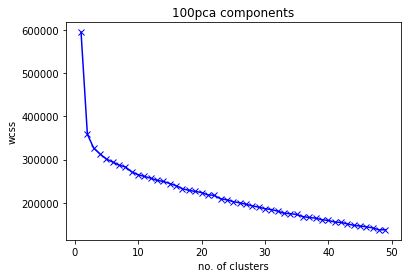

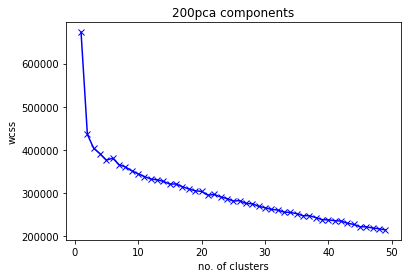

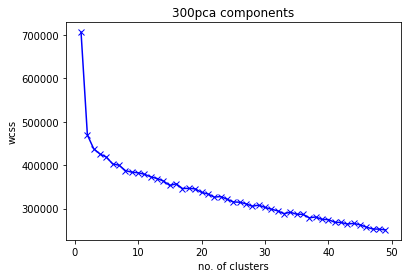

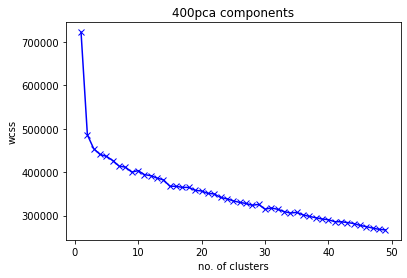

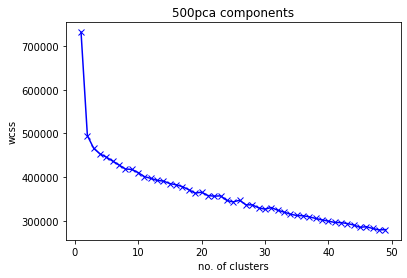

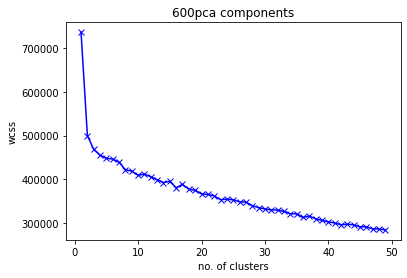

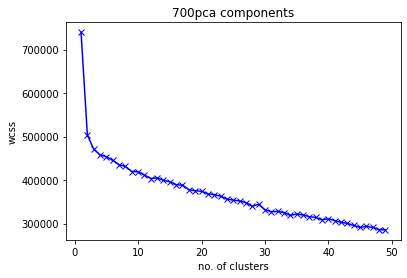

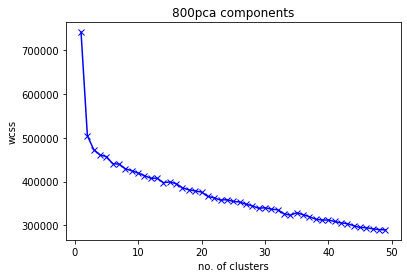

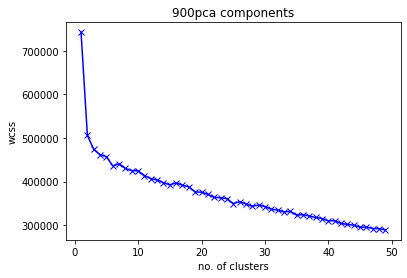

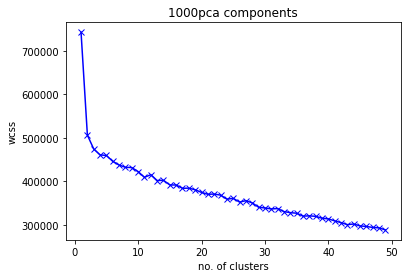

In [ ]:
import warnings
warnings.filterwarnings('ignore')  
for j in range(100 , 1100 , 100):  
  h = mk
  pca = PCA(n_components=j) 
  pc = pca.fit_transform(h)
  inertia = []
  range_val = range(1,50)
  for i in range_val:
    kmean = KMeans(n_clusters = i)
    kmean.fit_predict(pc)
    inertia.append(kmean.inertia_)
  plt.plot(range_val,inertia , 'bx-')
  plt.title(str(j) + 'pca components')
  plt.xlabel('no. of clusters')
  plt.ylabel('wcss')
  plt.show()  


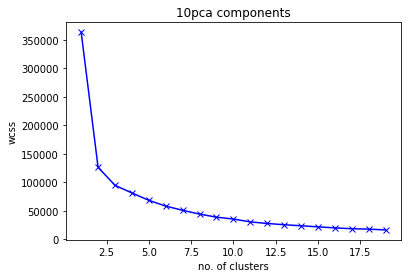

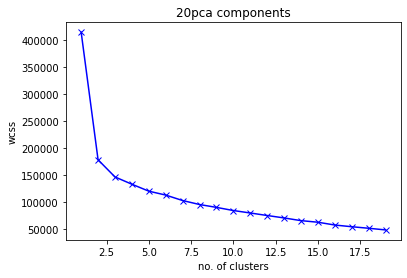

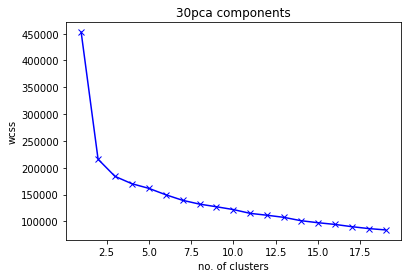

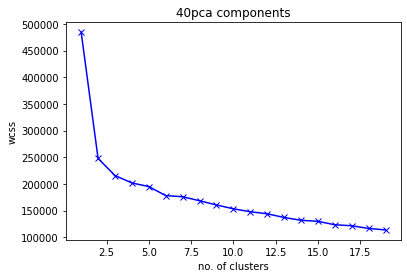

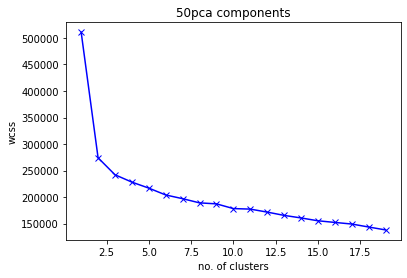

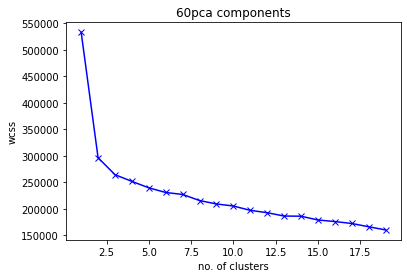

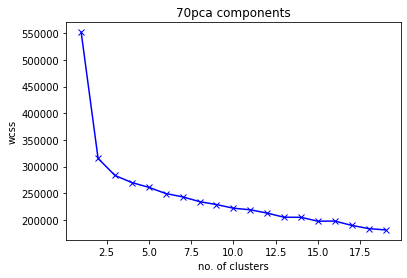

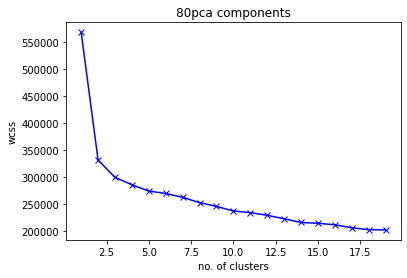

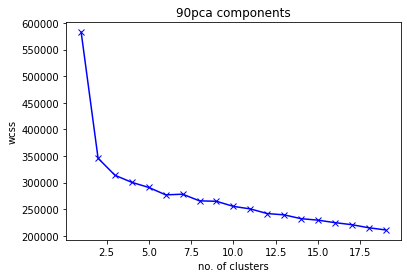

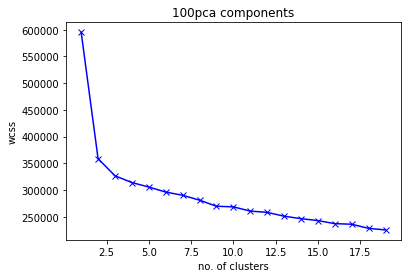

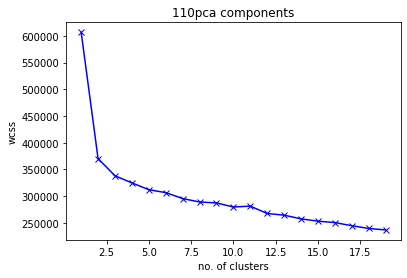

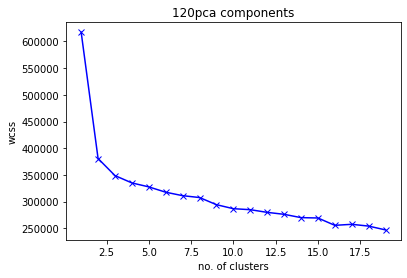

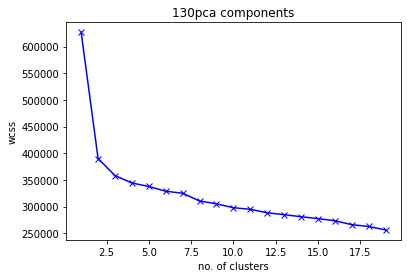

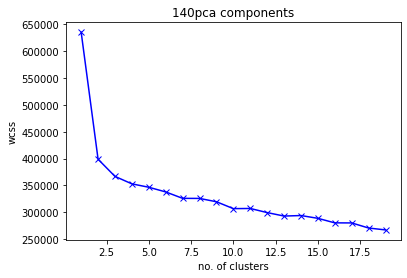

In [ ]:
import warnings
warnings.filterwarnings('ignore')  
for j in range(10 , 150 , 10):  
  h = mk
  pca = PCA(n_components=j) 
  pc = pca.fit_transform(h)
  inertia = []
  range_val = range(1,20)
  for i in range_val:
    kmean = KMeans(n_clusters = i)
    kmean.fit_predict(pc)
    inertia.append(kmean.inertia_)
  plt.plot(range_val,inertia , 'bx-')
  plt.title(str(j) + 'pca components')
  plt.xlabel('no. of clusters')
  plt.ylabel('wcss')
  plt.show()  

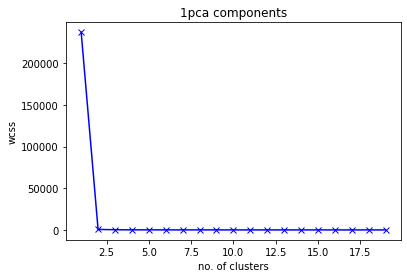

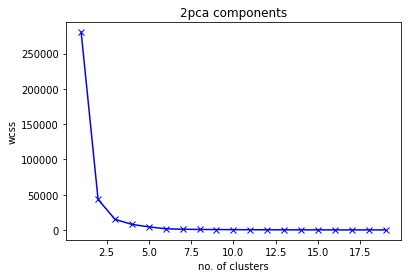

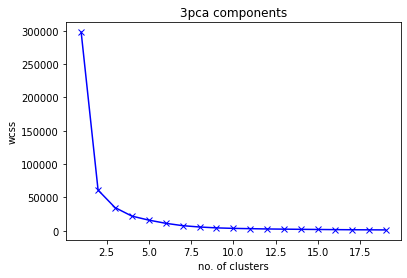

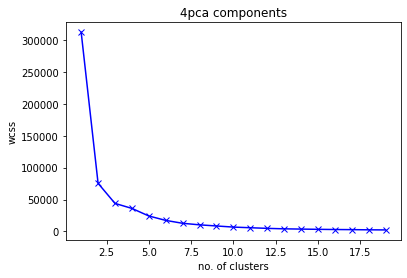

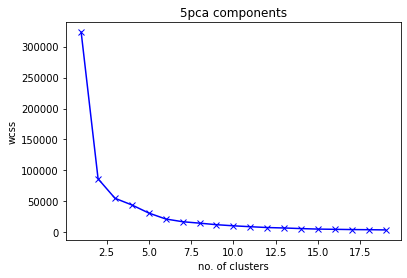

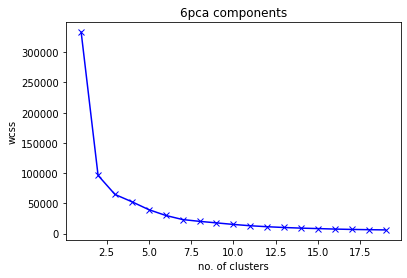

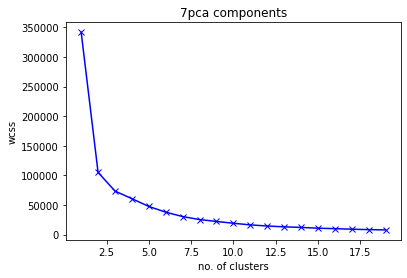

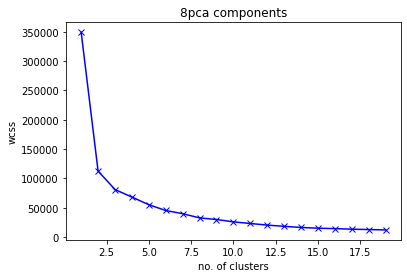

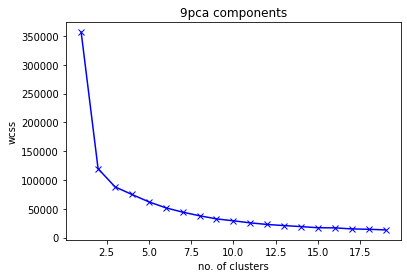

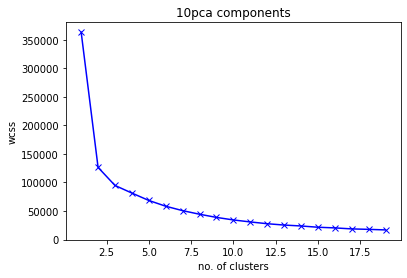

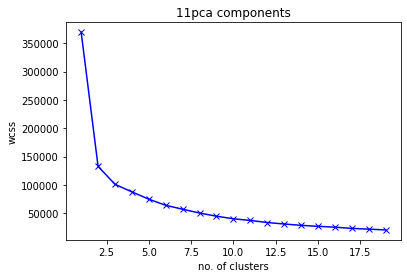

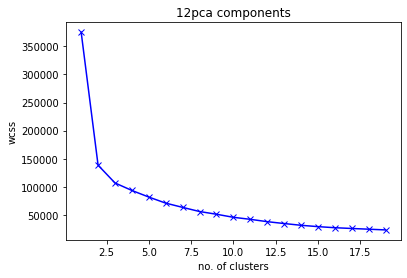

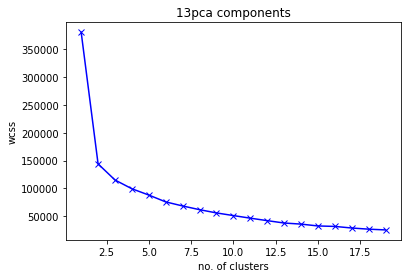

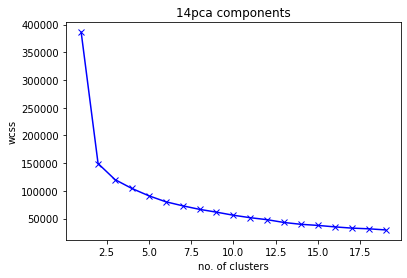

In [ ]:
import warnings
warnings.filterwarnings('ignore')  
for j in range(1 , 15, 1):  
  h = mk
  pca = PCA(n_components=j) 
  pc = pca.fit_transform(h)
  inertia = []
  range_val = range(1,20)
  for i in range_val:
    kmean = KMeans(n_clusters = i)
    kmean.fit_predict(pc)
    inertia.append(kmean.inertia_)
  plt.plot(range_val,inertia , 'bx-')
  plt.title(str(j) + 'pca components')
  plt.xlabel('no. of clusters')
  plt.ylabel('wcss')
  plt.show()  

In [ ]:
# it can be clearly observed that 2 pca components 3 clusters gives the best results.

#by the elbow method i am selecting 3 as no of clusters

In [36]:
# final model
h = mk
pca = PCA(n_components=2) 
pc = pca.fit_transform(h)

kmean = KMeans(n_clusters = 3 , random_state = 12)
k = kmean.fit_predict(pc)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:1692: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['tuple']. An error will be raised in 1.2.
  FutureWarning,


In [37]:
w = k.tolist()

In [38]:
dfd['label'] = w 


In [39]:
dfd

p                                            \
contentId -1006791494035379303 -1021685224930603833 -1022885988494278200   
0                          0.0                  0.0                  0.0   
1                          1.0                  0.0                  0.0   
2                          0.0                  0.0                  0.0   
3                          0.0                  0.0                  0.0   
4                          0.0                  0.0                  0.0   
...                        ...                  ...                  ...   
1890                       0.0                  0.0                  0.0   
1891                       0.0                  0.0                  0.0   
1892                       0.0                  0.0                  0.0   
1893                       0.0                  0.0                  0.0   
1894                       0.0                  0.0                  0.0   

                                                                       \
contentId -1024046541613287684 -1033806831489252007 -1038011342017850   
0                          0.0                  0.0               0.0   
1                          0.0                  0.0               0.0   
2                          0.0                  0.0               0.0   
3                          0.0                  0.0               0.0   
4                          0.0                  0.0               0.0   
...                        ...                  ...               ...   
1890                       0.0                  0.0               0.0   
1891                       0.0                  0.0               0.0   
1892                       0.0                  0.0               0.0   
1893                       0.0                  0.0               0.0   
1894                       0.0                  0.0               0.0   

                                                                          \
contentId -1039912738963181810 -1046621686880462790 -1051830303851697653   
0                          0.0                  0.0                  0.0   
1                          1.0                  0.0                  0.0   
2                          0.0                  0.0                  0.0   
3                          0.0                  0.0                  0.0   
4                          0.0                  0.0                  0.0   
...                        ...                  ...                  ...   
1890                       0.0                  0.0                  0.0   
1891                       0.0                  0.0                  0.0   
1892                       0.0                  0.0                  0.0   
1893                       0.0                  0.0                  0.0   
1894                       0.0                  0.0                  0.0   

                                ...                                        \
contentId -1055630159212837930  ... 943818026930898372 957332268361319692   
0                          0.0  ...                0.0                0.0   
1                          0.0  ...                4.0                0.0   
2                          0.0  ...                0.0                0.0   
3                          0.0  ...                0.0                0.0   
4                          0.0  ...                0.0                0.0   
...                        ...  ...                ...                ...   
1890                       0.0  ...                0.0                0.0   
1891                       0.0  ...                0.0                0.0   
1892                       0.0  ...                0.0                0.0   
1893                       0.0  ...                0.0                0.0   
1894                       0.0  ...                0.0                0.0   

                                                                    \
contentId 962287586799267519 

In [40]:
dfd['label'].value_counts()

0    1892
2       2
1       1
Name: label, dtype: int64